In [45]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import freqz

plt.rcParams.update({"axes.grid": True, "font.size": 14})

Exemplo

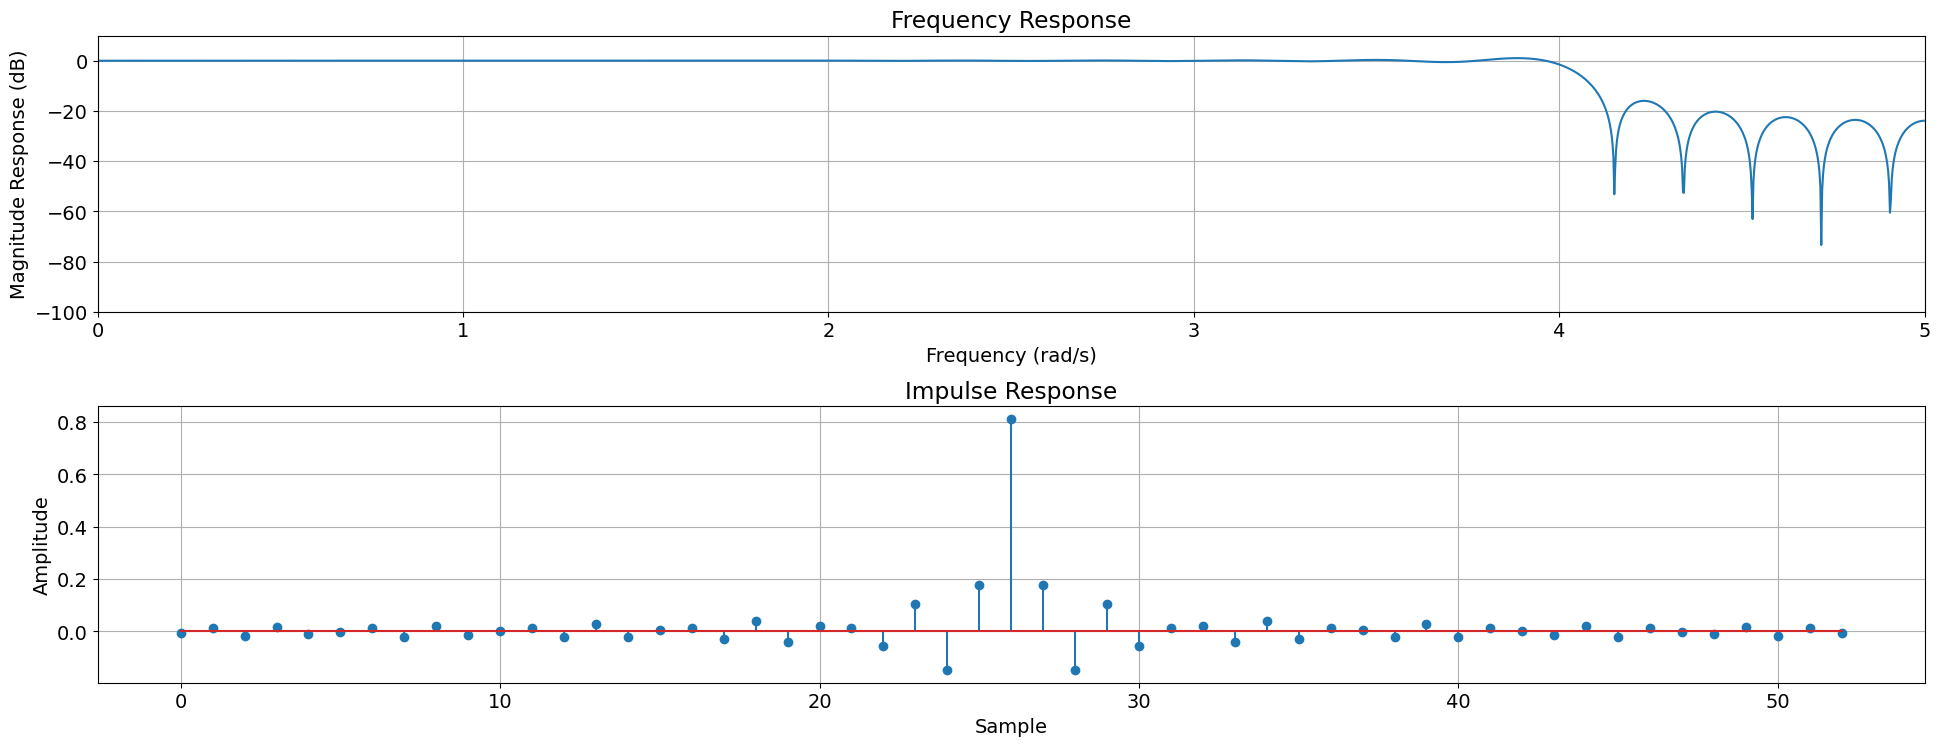

In [53]:
# Initialize variables
M = 52
N = M + 1
Omega_p = 4
Omega_r = 4.2
Omega_s = 10

# Calculate kp and kr
kp = int(np.floor(N * Omega_p / Omega_s))
kr = int(np.floor(N * Omega_r / Omega_s))


# Ensure kp and kr are valid
if (kr - kp) > 1:
    kp = kr - 1

# Create array A
A = np.concatenate((np.ones(kp + 1), np.zeros(int(M / 2 - kr + 1))))


# Calculate the filter coefficients
k = np.arange(1, M // 2 + 1)  # Ensure k is integer
h = np.zeros(M + 1)
for n in range(M + 1):
    h[n] = A[0] + 2 * np.sum((-1) ** k * A[k] * np.cos(np.pi * k * (1 + 2 * n) / N))

# Normalize the filter coefficients
h = h / N

# Frequency response
w, H = freqz(h, worN=2048, fs=Omega_s)

fig, axs = plt.subplots(2, 1, figsize=(20, 8))
fig.tight_layout(pad=3.0)

axs[0].plot(w, 20 * np.log10(np.abs(H)))
axs[0].axis([0, 5, -100, 10])
axs[0].set_ylabel("Magnitude Response (dB)")
axs[0].set_xlabel("Frequency (rad/s)")
axs[0].set_title("Frequency Response")

axs[1].stem(h)
axs[1].set_ylabel("Amplitude")
axs[1].set_xlabel("Sample")
axs[1].set_title("Impulse Response")

plt.show()

1.Projete um filtro passa-baixas usando o método da amostragem em frequência que satisfaça a
especificação a seguir:

- $M = 200$
- $\Omega_p = 4,0$ rad/s
- $\Omega_r = 4,2$ rad/s
- $\Omega_s = 10,0$ rad/s

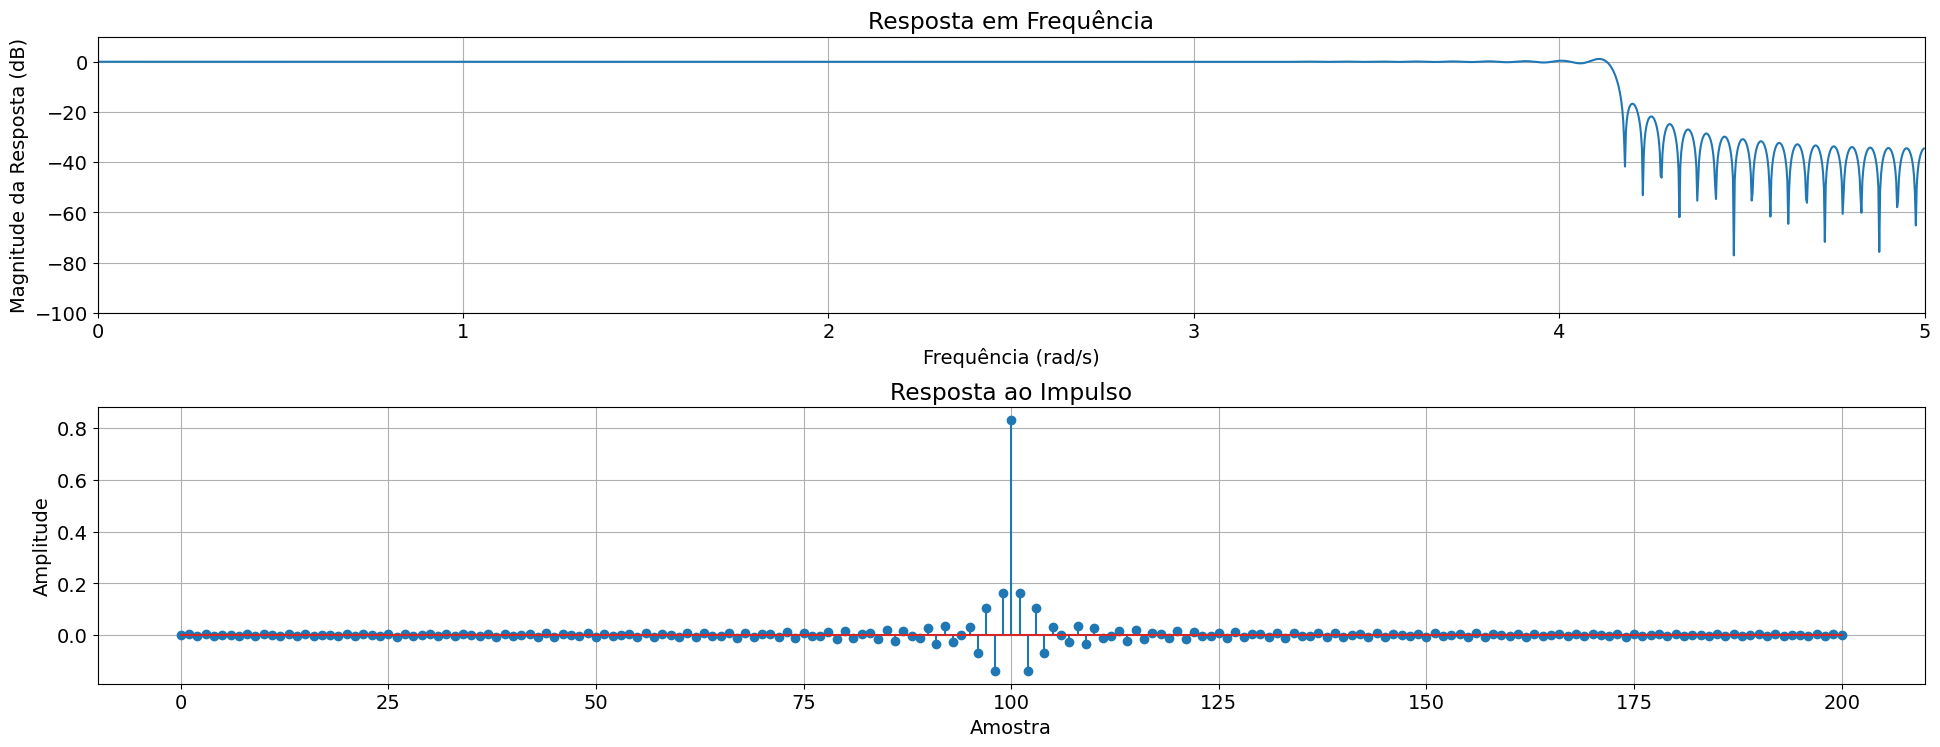

In [54]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import freqz

# Definição dos parâmetros do filtro
M = 200  # Comprimento do filtro menos um
N = M + 1  # Comprimento total do filtro
Omega_p = 4  # Frequência de corte da banda de passagem
Omega_r = 4.2  # Frequência de corte da banda de rejeição
Omega_s = 10  # Frequência de amostragem

# Calcula os índices de truncamento
kp = np.floor(N * Omega_p / Omega_s).astype(int)
kr = np.floor(N * Omega_r / Omega_s).astype(int)

# Ajusta kp se a diferença entre kr e kp for maior do que 1
if (kr - kp) > 1:
    kp = kr - 1

# Constrói a janela
A = np.concatenate((np.ones(kp + 1), np.zeros(M // 2 - kr + 1)))

# Calcula os coeficientes do filtro FIR usando a janela
k = np.arange(1, M // 2 + 1)
h = np.zeros(N)

for n in range(M + 1):
    h[n] = A[0] + 2 * np.sum((-1) ** k * A[k] * np.cos(np.pi * k * (1 + 2 * n) / N))

# Normaliza os coeficientes
h = h / N

# Calcula a resposta em frequência do filtro
w, H = freqz(h, worN=2048, fs=Omega_s)

# Plota a resposta em frequência em decibéis versus a frequência
fig, axs = plt.subplots(2, 1, figsize=(20, 8))
fig.tight_layout(pad=3.0)

axs[0].plot(w, 20 * np.log10(np.abs(H)))
axs[0].axis([0, 5, -100, 10])
axs[0].set_ylabel("Magnitude da Resposta (dB)")
axs[0].set_xlabel("Frequência (rad/s)")
axs[0].set_title("Resposta em Frequência")

axs[1].stem(h)
axs[1].set_ylabel("Amplitude")
axs[1].set_xlabel("Amostra")
axs[1].set_title("Resposta ao Impulso")

plt.show()

2. Projete um filtro passa-altas usando o método da amostragem em frequência que satisfaça a
especificação a seguir:

- $M = 52$
- $\Omega_r = 4,0$ rad/s
- $\Omega_p = 4,2$ rad/s
- $\Omega_s = 10,0$ rad/s
- Agora aumente o número de amostras, mantendo a paridade e faça suas considerações.

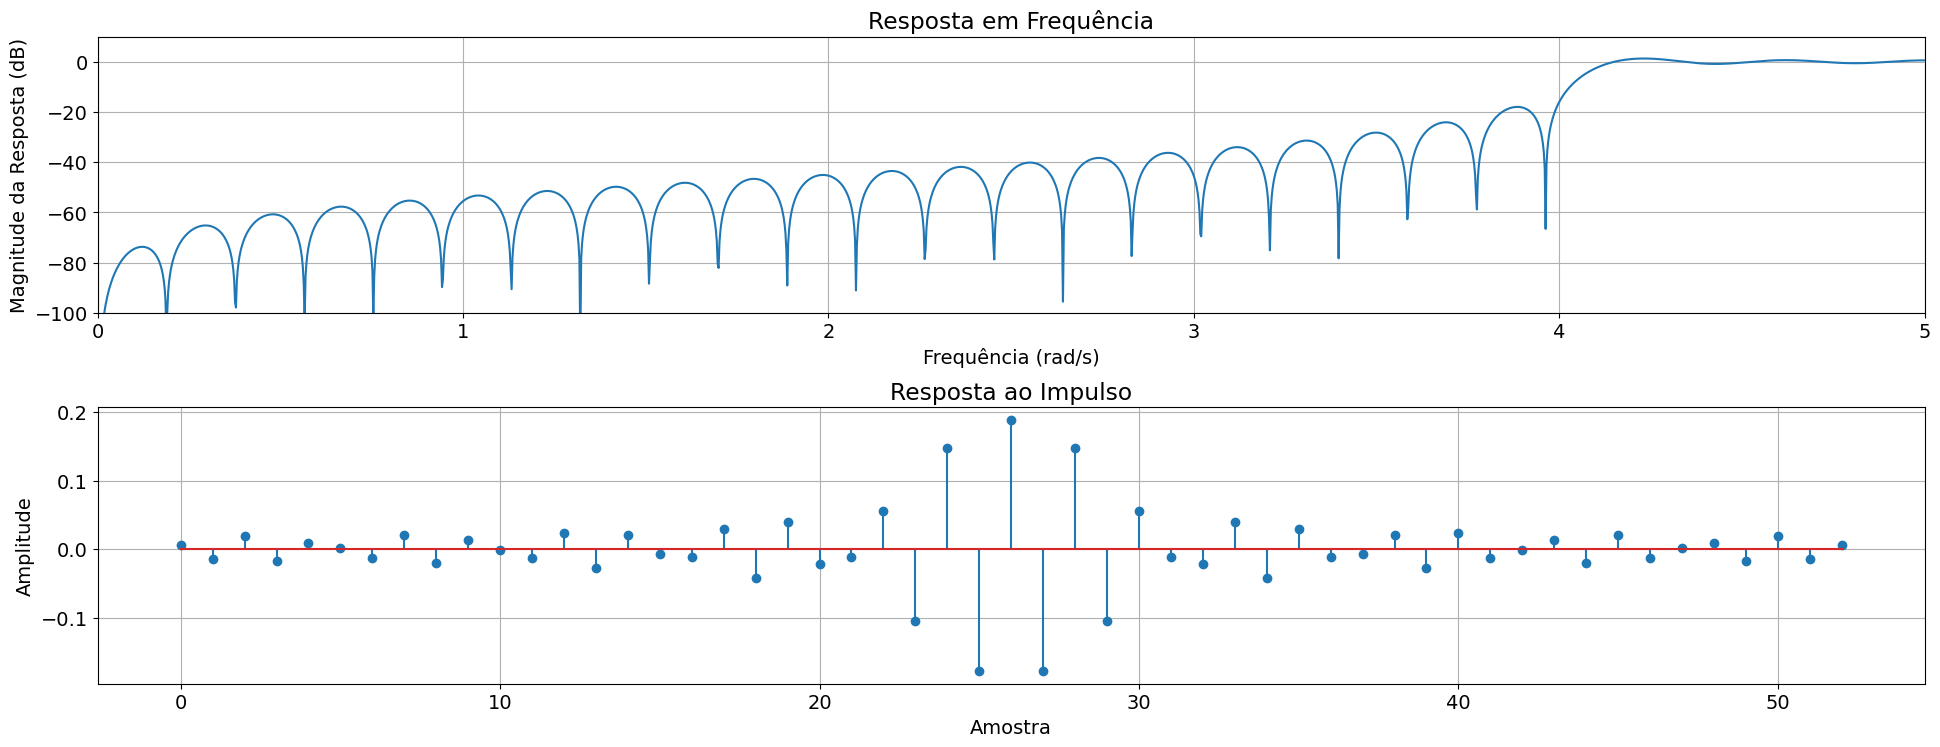

In [48]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import freqz

# Parâmetros do filtro
M = 52  # Comprimento do filtro menos um
N = M + 1  # Comprimento do filtro
Omega_r = 4.0  # Frequência de corte da banda de passagem
Omega_p = 4.2  # Frequência de corte da banda de rejeição
Omega_s = 10.0  # Frequência de amostragem

# Calcular índices de truncamento
kp = np.floor(N * Omega_p / Omega_s).astype(int)
kr = np.floor(N * Omega_r / Omega_s).astype(int)

# Ajusta kp se a diferença entre kr e kp for maior do que 1
if (kr - kp) > 1:
    kp = kr - 1

A = np.concatenate((np.zeros(kr + 1), np.ones(M // 2 - kp + 1)))

h = np.zeros(N)

# Calcular coeficientes do filtro FIR passa-altas
k = np.arange(1, M // 2 + 1)

for n in range(M + 1):
    h[n] = A[0] + 2 * np.sum((-1) ** k * A[k] * np.cos(np.pi * k * (1 + 2 * n) / N))

h = h / N

# Calcular resposta em frequência
w, H = freqz(h, worN=2048, fs=Omega_s)

fig, axs = plt.subplots(2, 1, figsize=(20, 8))
fig.tight_layout(pad=3.0)

axs[0].plot(w, 20 * np.log10(np.abs(H)))
axs[0].axis([0, 5, -100, 10])
axs[0].set_ylabel("Magnitude da Resposta (dB)")
axs[0].set_xlabel("Frequência (rad/s)")
axs[0].set_title("Resposta em Frequência")

axs[1].stem(h)
axs[1].set_ylabel("Amplitude")
axs[1].set_xlabel("Amostra")
axs[1].set_title("Resposta ao Impulso")

plt.show()

3. Projete um filtro passa-faixa usando o método da amostragem em frequência que satisfaça a
especificação a seguir:
- $M = 52$
- $\Omega_{r1} = 2$ rad/s
- $\Omega_{p1} = 3$ rad/s
- $\Omega_{p2} = 7$ rad/s
- $\Omega_{r2} = 8$ rad/s
- $\Omega_s = 20,0$ rad/s
- Agora aumente o número de amostras, mantendo sua paridade e faça suas considerações.

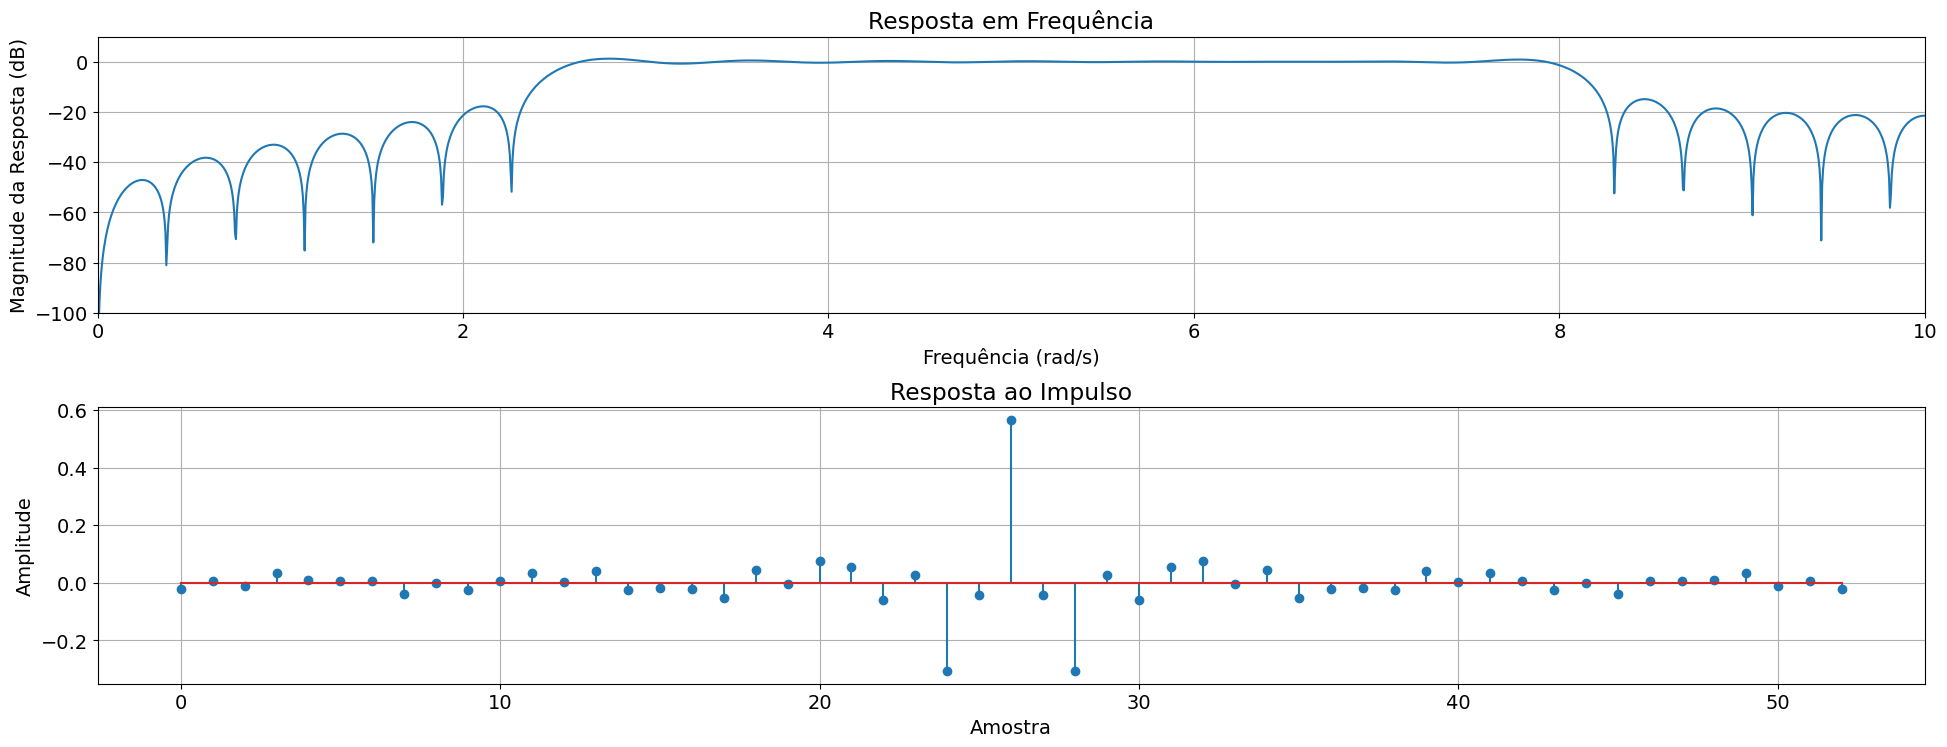

In [49]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import freqz

# Parâmetros do filtro passa-faixa
M = 52  # Comprimento do filtro menos um
N = M + 1  # Comprimento total do filtro
Omega_r1 = 2  # Frequência de corte inferior da banda de rejeição
Omega_p1 = 3  # Frequência de corte inferior da banda de passagem
Omega_p2 = 7  # Frequência de corte superior da banda de passagem
Omega_r2 = 8  # Frequência de corte superior da banda de rejeição
Omega_s = 20.0  # Frequência de amostragem

# Calcular índices de truncamento
kp1 = np.floor(N * Omega_p1 / Omega_s).astype(int)
kr1 = np.floor(N * Omega_r1 / Omega_s).astype(int)
kp2 = np.floor(N * Omega_p2 / Omega_s).astype(int)
kr2 = np.floor(N * Omega_r2 / Omega_s).astype(int)

# Ajusta kp se a diferença entre kr e kp for maior do que 1
if (kr1 - kp1) > 1:
    kp1 = kr1 - 1

# Ajusta kp se a diferença entre kr e kp for maior do que 1
if (kr2 - kp2) > 1:
    kp2 = kr2 - 1

A = np.zeros(N)
A[kp1 : kr2 + 1] = 1

h = np.zeros(N)

k = np.arange(1, M // 2 + 1)

for n in range(M + 1):
    h[n] = A[0] + 2 * np.sum((-1) ** k * A[k] * np.cos(np.pi * k * (1 + 2 * n) / N))

h = h / N

# Calcular resposta em frequência
w, H = freqz(h, worN=2048, fs=Omega_s)

fig, axs = plt.subplots(2, 1, figsize=(20, 8))
fig.tight_layout(pad=3.0)

axs[0].plot(w, 20 * np.log10(np.abs(H)))
axs[0].axis([0, 10, -100, 10])
axs[0].set_ylabel("Magnitude da Resposta (dB)")
axs[0].set_xlabel("Frequência (rad/s)")
axs[0].set_title("Resposta em Frequência")

axs[1].stem(h)
axs[1].set_ylabel("Amplitude")
axs[1].set_xlabel("Amostra")
axs[1].set_title("Resposta ao Impulso")

plt.show()

4. Projete um filtro rejeita-faixa usando o método da amostragem em frequência que satisfaça a
especificação a seguir:

- M = 52
- $\Omega_{p1} = 2$ rad/s
- $\Omega_{r1} = 3$ rad/s
- $\Omega_{r2} = 7$ rad/s
- $\Omega_{p2} = 8$ rad/s
- $\Omega_s = 20,0$ rad/s 

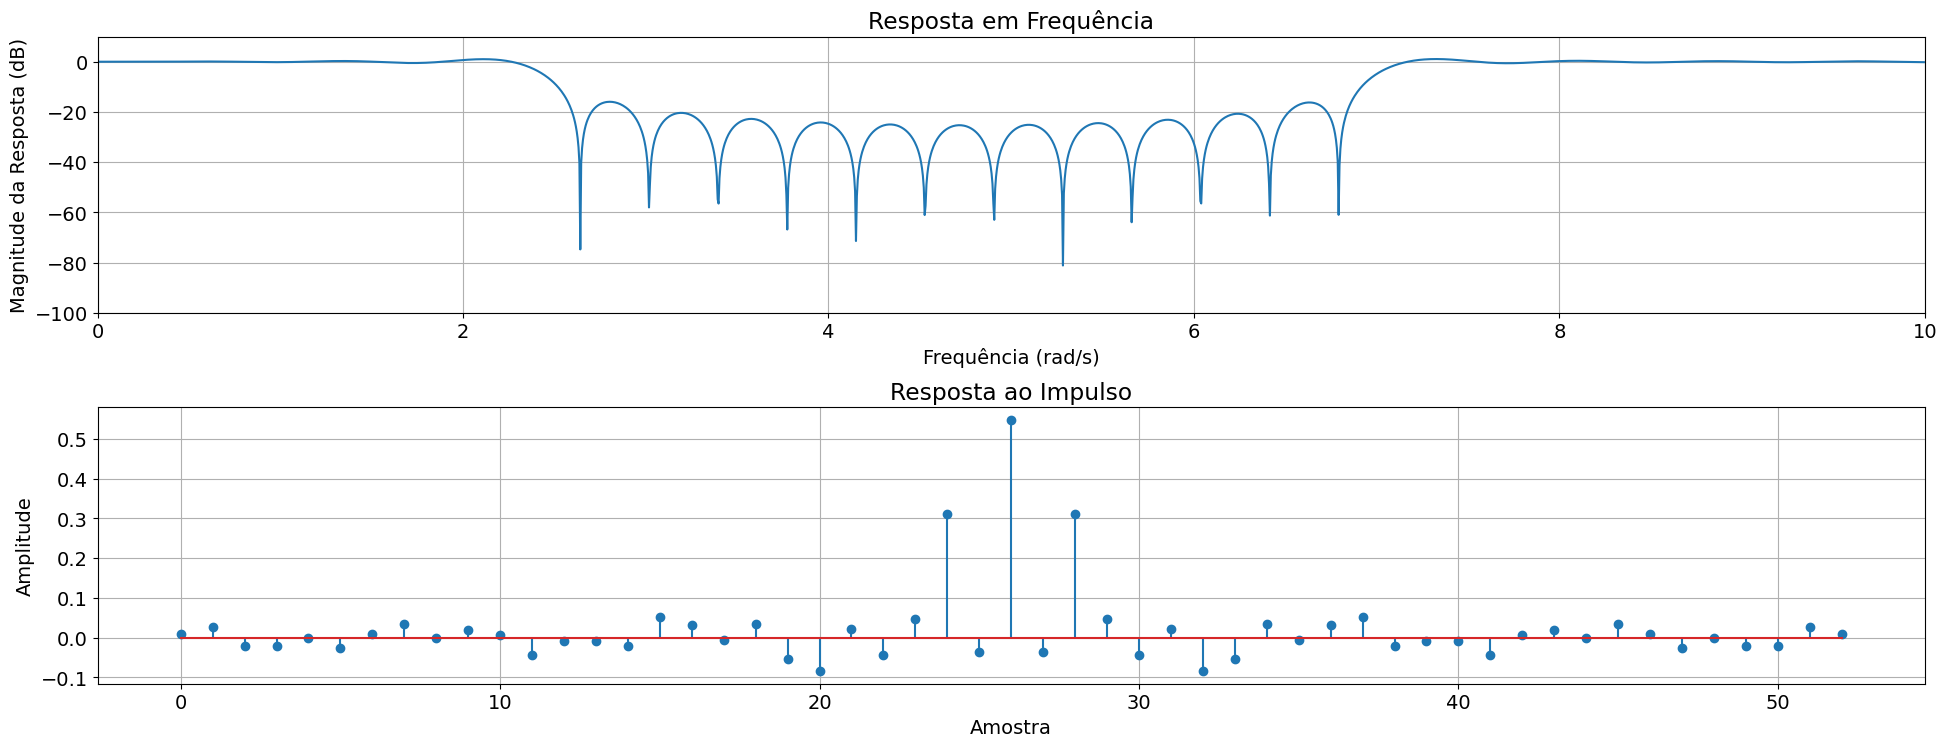

In [50]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import freqz

# Parâmetros do filtro passa-faixa
M = 52  # Comprimento do filtro menos um
N = M + 1  # Comprimento total do filtro
Omega_r1 = 3  # Frequência de corte inferior da banda de rejeição
Omega_p1 = 2  # Frequência de corte inferior da banda de passagem
Omega_p2 = 8  # Frequência de corte superior da banda de passagem
Omega_r2 = 7  # Frequência de corte superior da banda de rejeição
Omega_s = 20.0  # Frequência de amostragem

# Calcular índices de truncamento
kp1 = np.floor(N * Omega_p1 / Omega_s).astype(int)
kr1 = np.floor(N * Omega_r1 / Omega_s).astype(int)
kp2 = np.floor(N * Omega_p2 / Omega_s).astype(int)
kr2 = np.floor(N * Omega_r2 / Omega_s).astype(int)

# Ajusta kp se a diferença entre kr e kp for maior do que 1
if (kr1 - kp1) > 1:
    kp1 = kr1 - 1

# Ajusta kp se a diferença entre kr e kp for maior do que 1
if (kr2 - kp2) > 1:
    kp2 = kr2 - 1

A = np.ones(N)
A[kr1 : kr2 + 1] = 0

h = np.zeros(N)

k = np.arange(1, M // 2 + 1)

for n in range(M + 1):
    h[n] = A[0] + 2 * np.sum((-1) ** k * A[k] * np.cos(np.pi * k * (1 + 2 * n) / N))

h = h / N

# Calcular resposta em frequência
w, H = freqz(h, worN=2048, fs=Omega_s)


fig, axs = plt.subplots(2, 1, figsize=(20, 8))
fig.tight_layout(pad=3.0)

axs[0].plot(w, 20 * np.log10(np.abs(H)))
axs[0].axis([0, 10, -100, 10])
axs[0].set_ylabel("Magnitude da Resposta (dB)")
axs[0].set_xlabel("Frequência (rad/s)")
axs[0].set_title("Resposta em Frequência")

axs[1].stem(h)
axs[1].set_ylabel("Amplitude")
axs[1].set_xlabel("Amostra")
axs[1].set_title("Resposta ao Impulso")

plt.show()

5. Projete um filtro passa-faixa tipo III usando o método da amostragem em frequência que satisfaça a
especificação a seguir:

- $M = 52$
- $\Omega_{r1}   = 2$ rad/s
- $\Omega_{p1}   = 3$ rad/s
- $\Omega_{p2}   = 7$ rad/s
- $\Omega_{r2}   = 8$ rad/s
- $\Omega_{s }= 20,0$ rad/s
- Agora aumente o número de amostras, mantendo sua paridade. Compare com os resultados da questão 3.

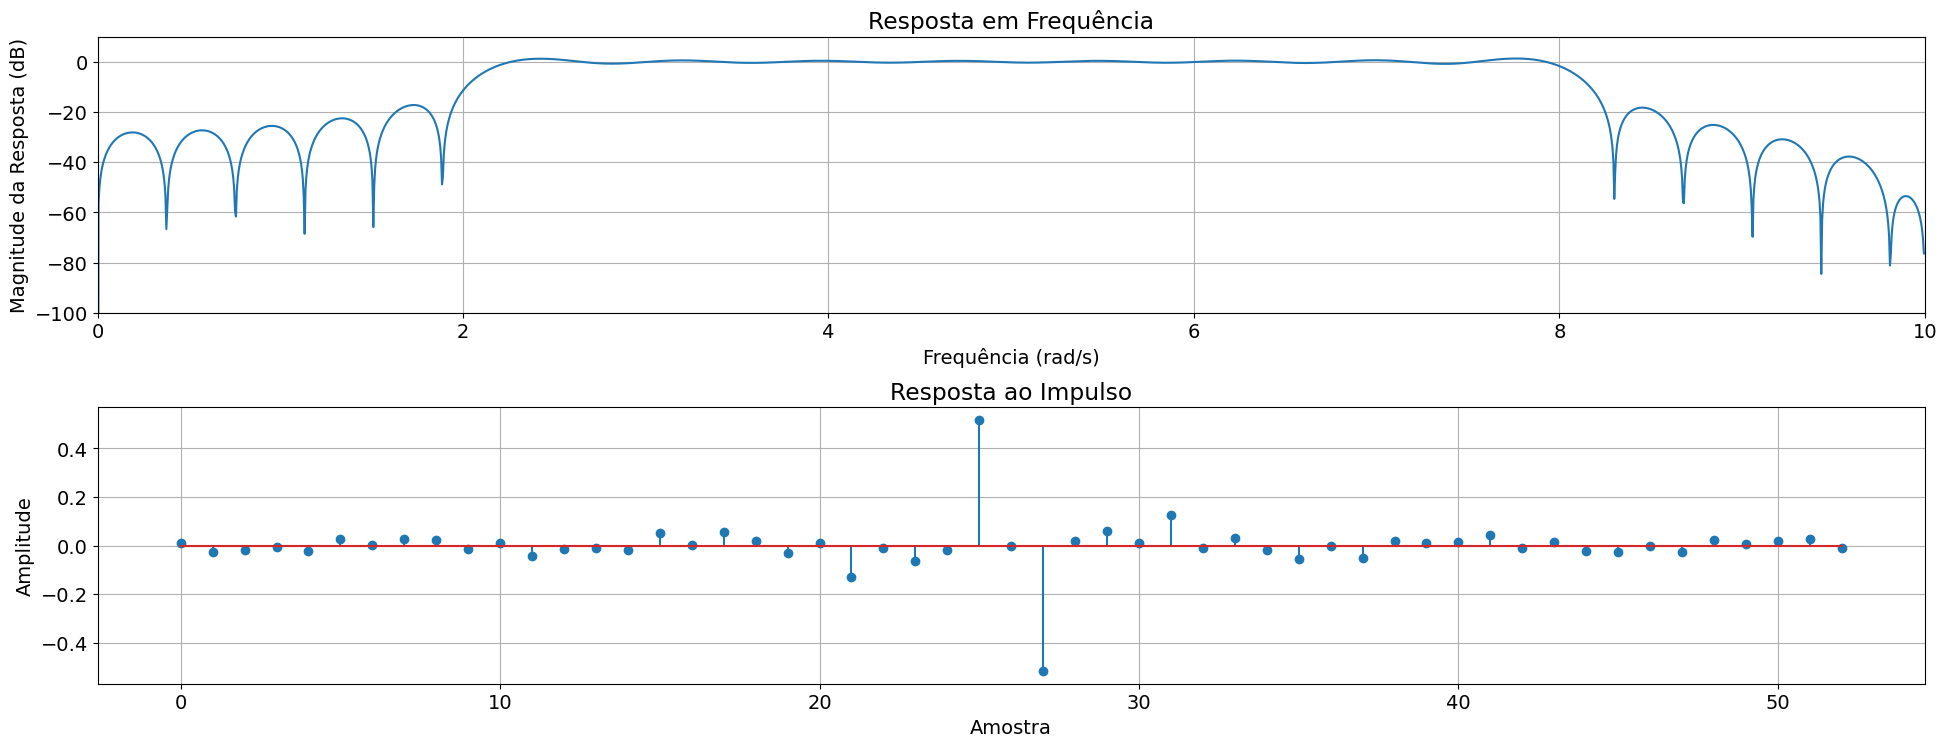

In [51]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import freqz

# Parâmetros do filtro passa-faixa
M = 52  # Comprimento do filtro menos um
N = M + 1  # Comprimento total do filtro
Omega_r1 = 3  # Frequência de corte inferior da banda de rejeição
Omega_p1 = 2  # Frequência de corte inferior da banda de passagem
Omega_p2 = 8  # Frequência de corte superior da banda de passagem
Omega_r2 = 7  # Frequência de corte superior da banda de rejeição
Omega_s = 20.0  # Frequência de amostragem

# Calcular índices de truncamento
kp1 = np.floor(N * Omega_p1 / Omega_s).astype(int)
kr1 = np.floor(N * Omega_r1 / Omega_s).astype(int)
kp2 = np.floor(N * Omega_p2 / Omega_s).astype(int)
kr2 = np.floor(N * Omega_r2 / Omega_s).astype(int)

# Ajusta kp se a diferença entre kr e kp for maior do que 1
if (kr1 - kp1) > 1:
    kp1 = kr1 - 1

# Ajusta kp se a diferença entre kr e kp for maior do que 1
if (kr2 - kp2) > 1:
    kp2 = kr2 - 1

A = np.zeros(N)
A[kp1 : kp2 + 1] = 1

h = np.zeros(N)

k = np.arange(1, M // 2 + 1)

for n in range(M + 1):
    h[n] = 2 * np.sum((-1) ** (k + 1) * A[k] * np.sin(np.pi * k * (1 + 2 * n) / N))

h = h / N

# Calcular resposta em frequência
w, H = freqz(h, worN=2048, fs=Omega_s)

fig, axs = plt.subplots(2, 1, figsize=(20, 8))
fig.tight_layout(pad=3.0)

axs[0].plot(w, 20 * np.log10(np.abs(H)))
axs[0].axis([0, 10, -100, 10])
axs[0].set_ylabel("Magnitude da Resposta (dB)")
axs[0].set_xlabel("Frequência (rad/s)")
axs[0].set_title("Resposta em Frequência")

axs[1].stem(h)
axs[1].set_ylabel("Amplitude")
axs[1].set_xlabel("Amostra")
axs[1].set_title("Resposta ao Impulso")

plt.show()

6. Projete um filtro passa-baixas usando o método da amostragem em frequência que satisfaça a
especificação a seguir:

- $M = 53$
- $\Omega_p = 4,0$ rad/s
- $\Omega_r = 4,2$ rad/s
- $\Omega_s = 10,0$ rad/s 

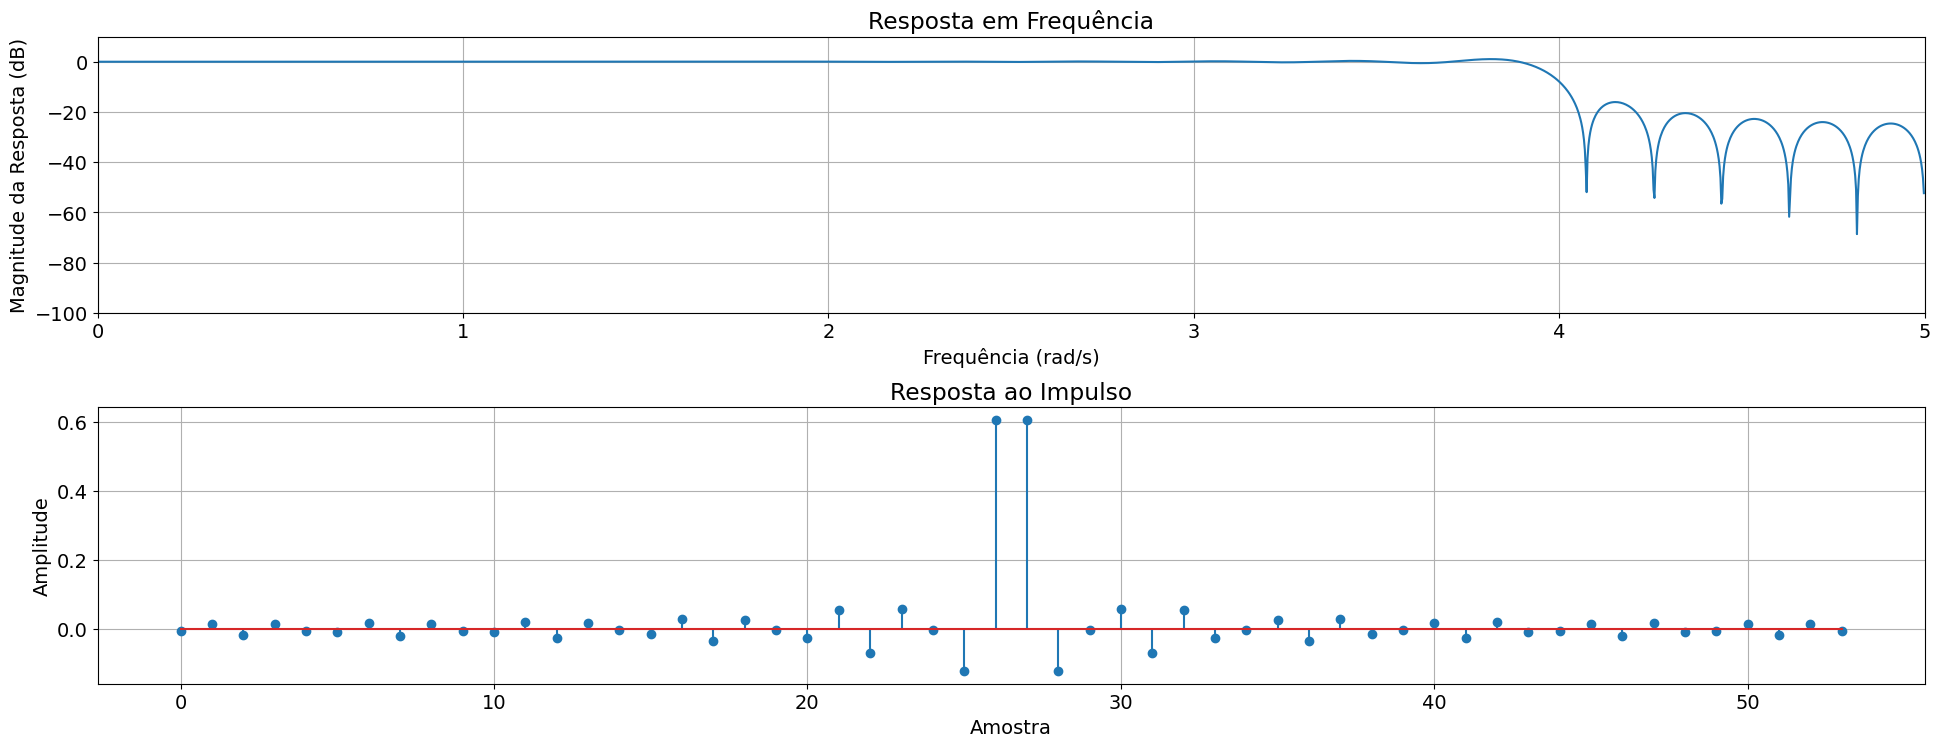

In [52]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import freqz

# Parâmetros do filtro
M = 53  # Comprimento do filtro menos um
N = M + 1  # Comprimento do filtro
Omega_p = 4.0  # Frequência de corte da banda de rejeição
Omega_r = 4.2  # Frequência de corte da banda de passagem
Omega_s = 10.0  # Frequência de amostragem

# Calcular índices de truncamento
kp = np.floor(N * Omega_p / Omega_s).astype(int)
kr = np.floor(N * Omega_r / Omega_s).astype(int)

# Ajusta kp se a diferença entre kr e kp for maior do que 1
if (kr - kp) > 1:
    kp = kr - 1

A = np.concatenate((np.ones(kp + 1), np.zeros(round(M / 2) - kp + 1)))

h = np.zeros(N)

# Calcular coeficientes do filtro FIR passa-altas
k = np.arange(1, M // 2 + 1)

for n in range(M + 1):
    h[n] = A[0] + 2 * np.sum((-1) ** k * A[k] * np.cos(np.pi * k * (1 + 2 * n) / N))

h = h / N

# Calcular resposta em frequência
w, H = freqz(h, worN=2048, fs=Omega_s)

fig, axs = plt.subplots(2, 1, figsize=(20, 8))
fig.tight_layout(pad=3.0)

axs[0].plot(w, 20 * np.log10(np.abs(H)))
axs[0].axis([0, 5, -100, 10])
axs[0].set_ylabel("Magnitude da Resposta (dB)")
axs[0].set_xlabel("Frequência (rad/s)")
axs[0].set_title("Resposta em Frequência")

axs[1].stem(h)
axs[1].set_ylabel("Amplitude")
axs[1].set_xlabel("Amostra")
axs[1].set_title("Resposta ao Impulso")

plt.show()